# Video: Visualizing Principal Components

This video visualizes the Palmer Penguins data set using its first two principal components.

## Palmer Penguins

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)
Artwork by @allison_horst

Script:
* The Palmer penguins data set is a nice data set to show off visualizations like PCA.

Code Example: Penguin First Principal Component

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

Script:
* There's a new import in there for PCA support.
* sklearn is the sci-kit learn library and has implementations of many common machine learning algorithms.
* You will learn more about it in module 2 of this program.
* Let's load the penguin data now.

In [ ]:
penguins_adelie = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.3&entityid=002f3893385f710df69eeebe893144ff", index_col="Sample Number")
penguins_gentoo = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.3&entityid=e03b43c924f226486f2f0ab6709d2381", index_col="Sample Number")
penguins_chinstrap = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.2&entityid=fe853aa8f7a59aa84cdd3197619ef462", index_col="Sample Number")
penguins = pd.concat([penguins_adelie, penguins_gentoo, penguins_chinstrap])
penguins

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
Sample Number,,,,,,,,,,,,,,,,
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
5,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,PAL0910,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
65,PAL0910,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
66,PAL0910,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.


Script:
* There are a lot of different kinds of data in there, and principal components analysis requires numeric data, so we will want to filter that out.
* You don't need to follow all the programming details now.
* They will be covered in module 2.


In [ ]:
penguins_numeric_columns = [c for c in penguins.columns if penguins[c].dtype.name == 'float64']
penguins[penguins_numeric_columns]

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Sample Number,,,,,,
1,39.1,18.7,181.0,3750.0,NaN,NaN
2,39.5,17.4,186.0,3800.0,8.94956,-24.69454
3,40.3,18.0,195.0,3250.0,8.36821,-25.33302
4,NaN,NaN,NaN,NaN,NaN,NaN
5,36.7,19.3,193.0,3450.0,8.76651,-25.32426
...,...,...,...,...,...,...
64,55.8,19.8,207.0,4000.0,9.70465,-24.53494
65,43.5,18.1,202.0,3400.0,9.37608,-24.40753
66,49.6,18.2,193.0,3775.0,9.46180,-24.70615


Script:
* Most of those are physical measurements of the penguins.
* The last two were looking at isotopes to learn about their feeding patterns.
* For the moment, we will not worry too much about the column interpretation and let the generic analysis of PCA take over.
* Before we do that though, take a moment to look at the numbers.
* The body mass numbers are much larger, and very a lot more than the other columns.
* Just within that preview, the body mass measurements change by 3 to 400 peak to trough.
* The column with the second highest variation, flipper length, has measurements changing by 20 or so.
* So we should expect body mass to be prominent in the first principal component since it has a lot of variance in an absolute sense compared to the other columns.
* And flipper length will probably be in the first or second principal component since it looks like it is next in variance.
* Let's calculate them and look at them now.

In [ ]:
pca = PCA()
pca.fit(penguins[penguins_numeric_columns].dropna())
penguins_components = pd.DataFrame(pca.components_, columns=penguins_numeric_columns)
penguins_components

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0.004014,-0.001149,0.015170,0.999876,-0.000369,-0.000368
1,-0.308003,0.093243,-0.946673,0.015707,0.001370,0.001227
2,0.936946,0.146198,-0.290194,0.000872,0.054578,0.116471
3,-0.123505,0.974537,0.136403,-0.000390,0.115170,0.056156
4,-0.108833,-0.099775,0.027162,0.000347,0.226099,0.962467
5,0.012303,0.101256,0.004877,-0.000275,-0.965730,0.238616


Script:
* As expected, body mass is most of the first principal component.
* And flipper length is most of the second principal component.
* Let's add the principal component coordinates to the data frame so we can plot them.

In [ ]:
for i in range(penguins_components.shape[0]):
    penguins[f"pca_{i}"] = penguins[penguins_numeric_columns] @ penguins_components.iloc[i].T

## Visualizing the First Two Principal Components


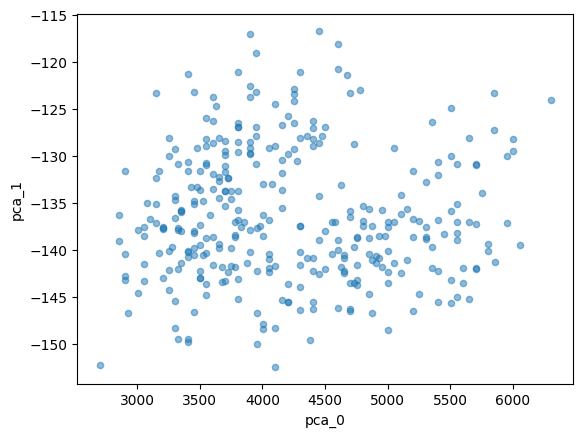

In [ ]:
_ = penguins.plot.scatter("pca_0", "pca_1", alpha=0.5)

Script:
* This looks like two butterfly wings to me.
* If the gap in the middle is real, and not just low data, then there appear to be at least two groups.
* Let's recolor this by species too.
* Principal component analysis often separates out groups within the data.

## Categorizing with the First Two Principal Components


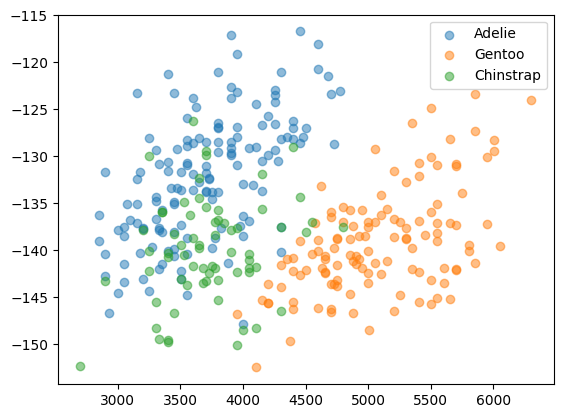

In [ ]:
for species in penguins["Species"].unique():
    species_df = penguins.query("Species == @species")
    plt.scatter(species_df["pca_0"], species_df["pca_1"], alpha=0.5, label=species.split()[0])
_ = plt.legend()

Script:
* Gentoo penguins do appear to be distinguishable here.
* The first principal component used for the x-axis mostly puts them on the right, but the bigger Adelie penguins do overlap that range.
* The second principal component gets the Gentoo penguins pretty separated from the other two.
* That is mostly based on body mass - Gentoo penguins are bigger, and we could have figured that by plotting all combinations of measurements, but this was automatic.
* The other two species, Adelie and Chinstrap penguins, are not separated so cleanly.
* Adelie penguins appear to be higher on the second principal component than Chinstrap penguins, but they overlap significantly in the vertical range, and they are pretty evenly mixed in the middle.
* Principal components analysis did not trivialize separating the species, but it looks like it makes some of it easier.